# Exploratory Data Analysis Starter

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load `client_data.csv` and `price_data.csv` into individual dataframes so that we can work with them in Python. For this notebook and all further notebooks, it will be assumed that the CSV files will the placed in the same file location as the notebook. If they are not, please adjust the directory within the `read_csv` method accordingly.

In [2]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [3]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [4]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


---

## Descriptive statistics of data

### Data types

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [5]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [6]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [7]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [8]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

In [9]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

Thhe first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

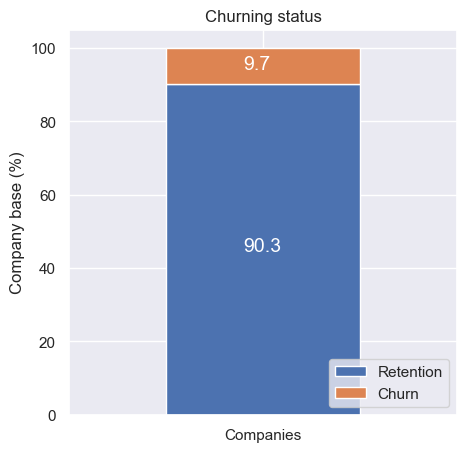

In [10]:
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

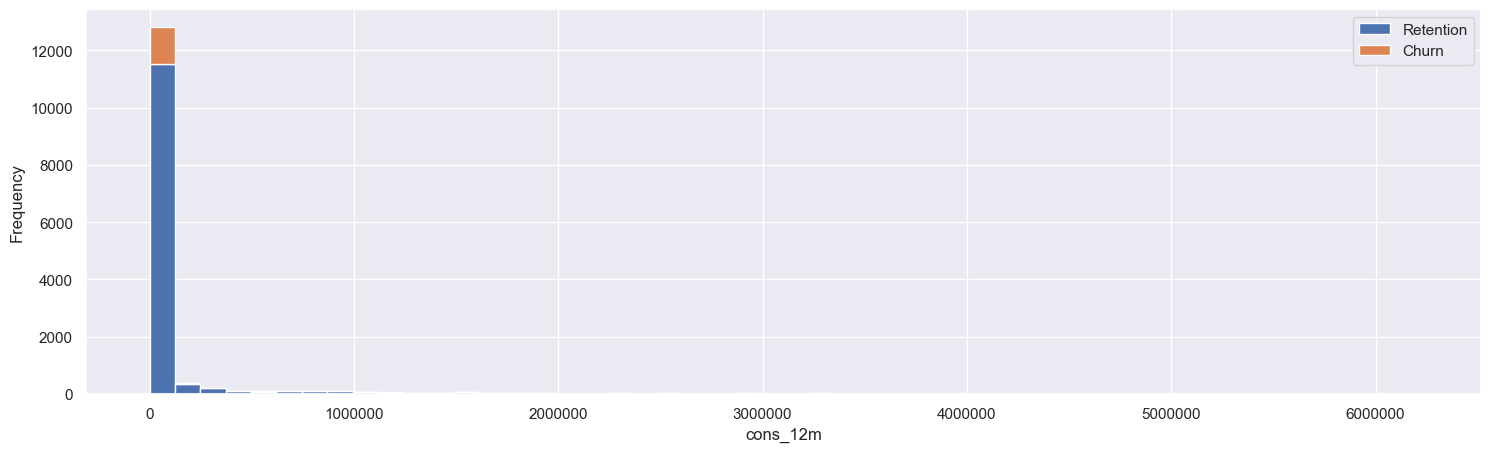

In [11]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

#### Analyze data types of each column
- Use the DataFrame's dtypes attribute to get the data types of each column


In [12]:
# # check the number of unique values from all of the object data types from client data
# client_df.select_dtypes(include='object').nunique()

# # get the variables of all columns with object as data type (categorical columns) exclusive
# client_categorical_variables = client_df.select_dtypes(include='object').columns.tolist()

# client_categorical_variables

In [13]:
client_column_data_types = client_df.dtypes
client_column_data_types

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

In [14]:
price_column_data_types = price_df.dtypes
price_column_data_types


id                     object
price_date             object
price_off_peak_var    float64
price_peak_var        float64
price_mid_peak_var    float64
price_off_peak_fix    float64
price_peak_fix        float64
price_mid_peak_fix    float64
dtype: object

#### Descriptive statistics of the dataset
- Use the describe() method on the DataFrame to get descriptive statistics
- This includes count, mean, std, min, 25%, 50%, 75%, max for numerical columns


In [15]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [16]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#### Distributions of columns

In [17]:
# Merge the DataFrames on the 'id' column
merged_df = pd.merge(client_df, price_df, on='id', how='inner')
merged_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


### Perform the train/validation/test split with Scikit-Learn

In [18]:
from sklearn.model_selection import train_test_split
# split the data into train dataset = 80% and test dataset = 20%
df_train_full, df_test = train_test_split(merged_df, test_size=0.2, random_state=1)

In [19]:
df_train_full.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
89951,ff3f1295f7296db51b94c012122a23b1,MISSING,15052,383,443,2011-11-18,2016-04-25,2014-04-25,2015-04-26,2001.55,...,lxidpiddsbxsbosboudacockeimpuepw,13.200,1,2015-04-01,0.148405,0.000000,0.000000,44.444710,0.00000,0.000000
104773,1f88ec7f2488e1117d67c7b244ea6955,ewpakwlliwisiwduibdlfmalxowmwpci,3939,0,873,2012-09-03,2016-09-02,2012-09-03,2015-09-03,589.98,...,lxidpiddsbxsbosboudacockeimpuepw,10.392,0,2015-06-01,0.151367,0.000000,0.000000,44.266930,0.00000,0.000000
26497,f0a607303320d13c6b70c5b361a873f9,lmkebamcaaclubfxadlmueccxoimlema,17360,27928,108,2010-05-03,2016-05-03,2010-05-03,2015-05-04,1311.22,...,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0,2015-04-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000
77037,dd4fbce4a6b7c842d66001f14399521e,foosdfpfkusacimwkcsosbicdxkicaua,13054,0,3190,2010-09-14,2016-03-10,2010-09-14,2015-03-11,1319.64,...,lxidpiddsbxsbosboudacockeimpuepw,17.320,0,2015-12-01,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555
92813,5766f964d71560b7d7cfbbe09df6bcee,lmkebamcaaclubfxadlmueccxoimlema,18063,11626,0,2012-12-21,2016-12-20,2015-10-30,2015-12-21,2659.47,...,ldkssxwpmemidmecebumciepifcamkci,13.200,0,2015-12-01,0.142790,0.000000,0.000000,44.266930,0.00000,0.000000


In [20]:
# take the df_train_full dataframe and split it one more time into train and validation
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)     

# Takes the column with the target variable, churn, and saves it outside the dataframe
y_train = df_train.churn.values  
y_val = df_val.churn.values     

# Deletes the churn columns from both dataframes to make sure we don’t accidentally use the churn variable as a feature during training 
del df_train['churn'] 
del df_val['churn']

In [21]:
# Check to see whether theres need to perform any additional null handling
df_train_full.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_peak_var          

In [22]:
# # Sum up the price components to get a total price per client
# df_train_full['total_price'] = df_train_full[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 
#                                       'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].sum(axis=1)

# # Calculate churn percentage based on the total price
# churn_percentage = df_train_full.groupby('churn')['total_price'].sum() / df_train_full['total_price'].sum() * 100

# # Display churn percentage
# print(churn_percentage)

In [23]:
# Sum up the price components to get a total price per client
df_train_full['total_price'] = df_train_full[['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 
                                      'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']].sum(axis=1)


In [24]:
# check the distribution of values in the target variable
df_train_full.churn.value_counts()

churn
0    126479
1     13640
Name: count, dtype: int64

In [25]:
global_mean = df_train_full.churn.mean()
print(f"The churn rate is ", round(global_mean, 3))

The churn rate is  0.097


#### Observation
- The data is imbalanced as the majority of the customers did not churn.
 Our  churn  dataset  is  an  example  of  a  so-called  imbalanced  dataset.  There  were
three times as many people who didn’t churn in our dataset as those who did churn,
and we say that the nonchurn class dominates the churn class. We can clearly see that:
the churn rate in our data is 0.097, which is a strong indicator of class imbalance.

In [26]:
df_train_full.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix,total_price
89951,ff3f1295f7296db51b94c012122a23b1,MISSING,15052,383,443,2011-11-18,2016-04-25,2014-04-25,2015-04-26,2001.55,...,13.200,1,2015-04-01,0.148405,0.000000,0.000000,44.444710,0.00000,0.000000,44.593115
104773,1f88ec7f2488e1117d67c7b244ea6955,ewpakwlliwisiwduibdlfmalxowmwpci,3939,0,873,2012-09-03,2016-09-02,2012-09-03,2015-09-03,589.98,...,10.392,0,2015-06-01,0.151367,0.000000,0.000000,44.266930,0.00000,0.000000,44.418297
26497,f0a607303320d13c6b70c5b361a873f9,lmkebamcaaclubfxadlmueccxoimlema,17360,27928,108,2010-05-03,2016-05-03,2010-05-03,2015-05-04,1311.22,...,13.800,0,2015-04-01,0.151367,0.000000,0.000000,44.266931,0.00000,0.000000,44.418298
77037,dd4fbce4a6b7c842d66001f14399521e,foosdfpfkusacimwkcsosbicdxkicaua,13054,0,3190,2010-09-14,2016-03-10,2010-09-14,2015-03-11,1319.64,...,17.320,0,2015-12-01,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,81.753068
92813,5766f964d71560b7d7cfbbe09df6bcee,lmkebamcaaclubfxadlmueccxoimlema,18063,11626,0,2012-12-21,2016-12-20,2015-10-30,2015-12-21,2659.47,...,13.200,0,2015-12-01,0.142790,0.000000,0.000000,44.266930,0.00000,0.000000,44.409720


In [27]:
numerical = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'pow_max', 'total_price']
categorical = ['channel_sales', 'churn']

In [28]:
df_train_full[categorical].nunique()

channel_sales    8
churn            2
dtype: int64

In [29]:
def plot_numerical_distributions(df, numerical_columns):
    """
    Plots the distribution of numerical columns in the given DataFrame.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - numerical_columns: list
        A list of column names (strings) that are numerical.
    """

    for column in numerical_columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True, bins=30)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()

def plot_categorical_distributions(df, categorical_columns):
    """
    Plots the distribution of categorical columns in the given DataFrame.

    Parameters:
    - df: pandas.DataFrame
        The DataFrame containing the data.
    - categorical_columns: list
        A list of column names (strings) that are categorical.
    """

    for column in categorical_columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=column, data=df)
        plt.title(f'Distribution of {column}')
        plt.xlabel('Count')
        plt.ylabel(column)
        plt.show()

c:\Users\denni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


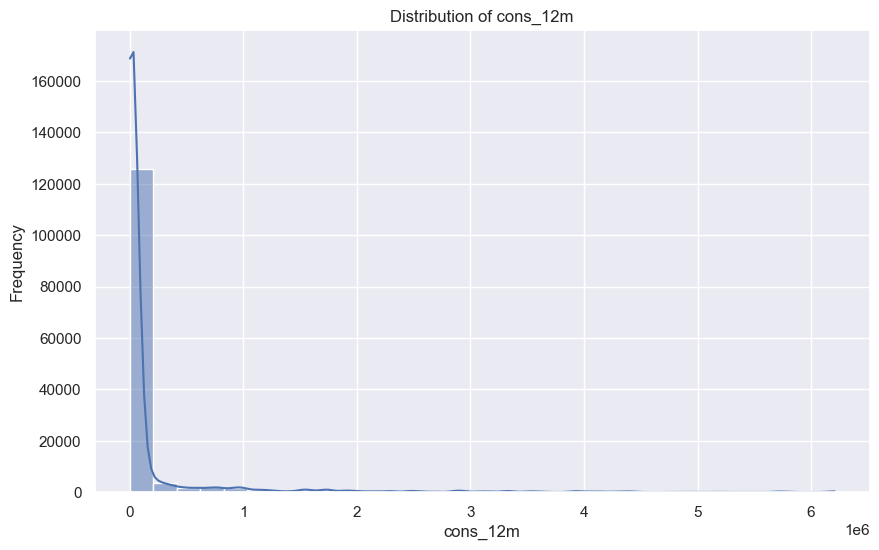

c:\Users\denni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


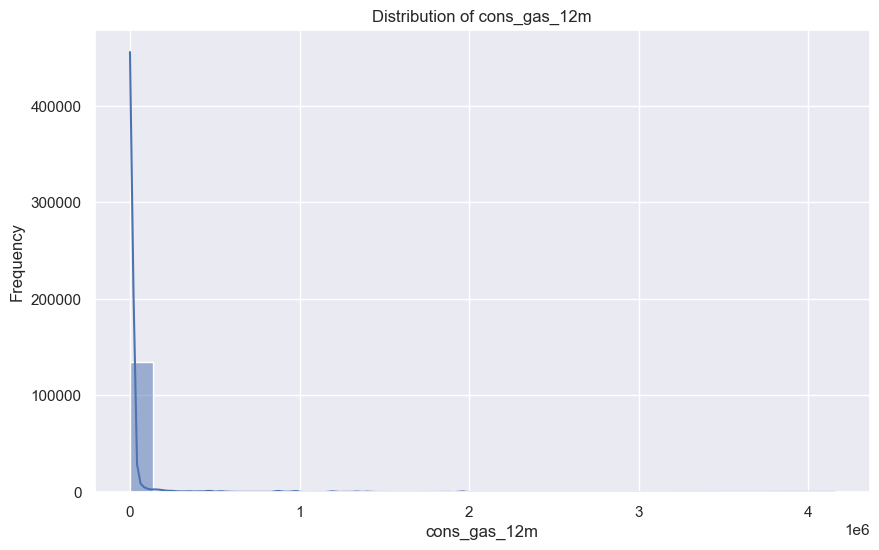

c:\Users\denni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


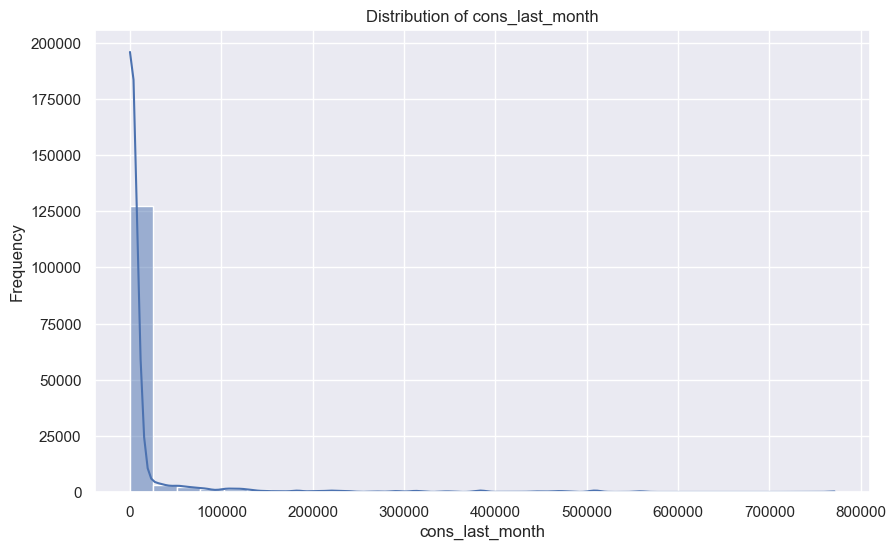

c:\Users\denni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


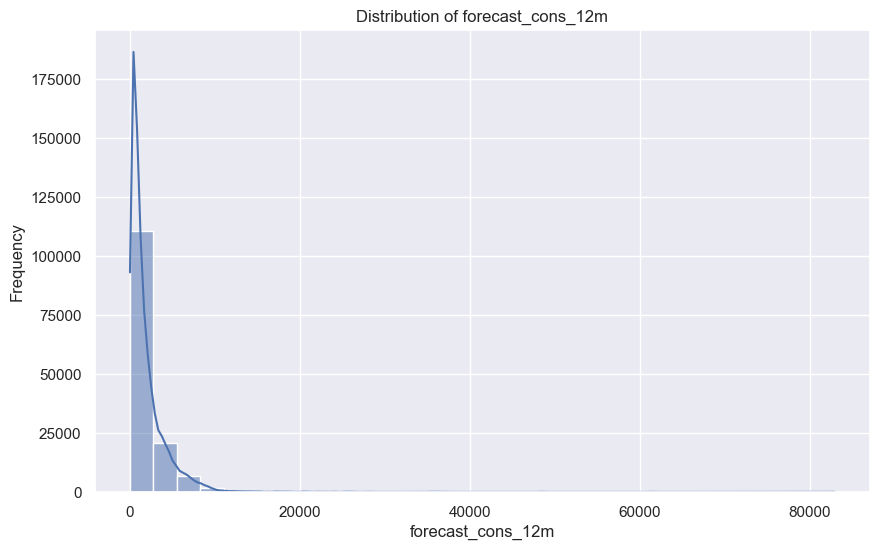

c:\Users\denni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


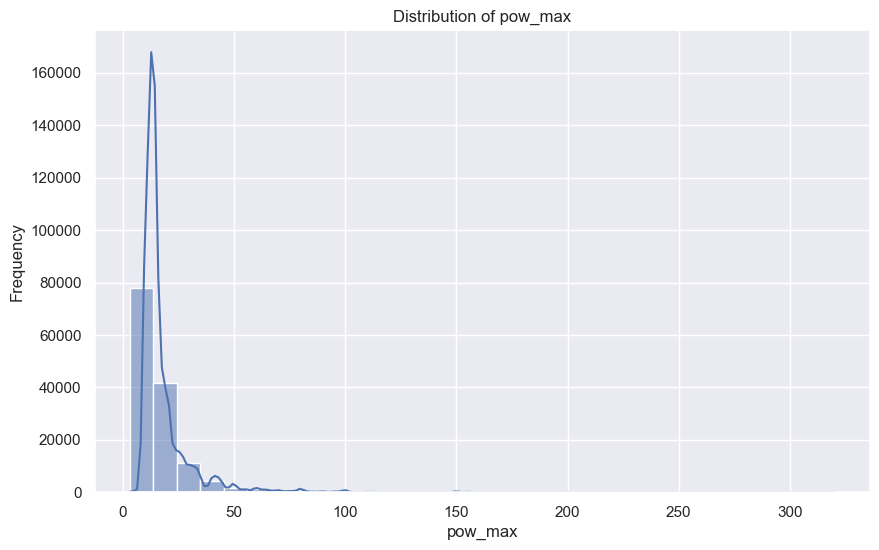

c:\Users\denni\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


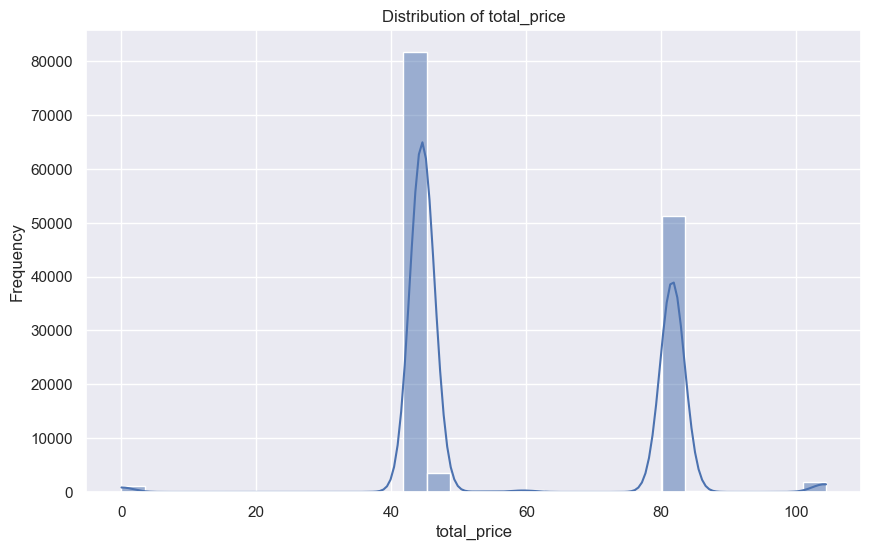

In [30]:
plot_numerical_distributions(df_train_full, numerical)

#### Observation
* Bimodal Distribution: 
- The histogram exhibits two prominent peaks—one around a total price of approximately 40 and another around 80. This suggests that there are two common total prices in the dataset.

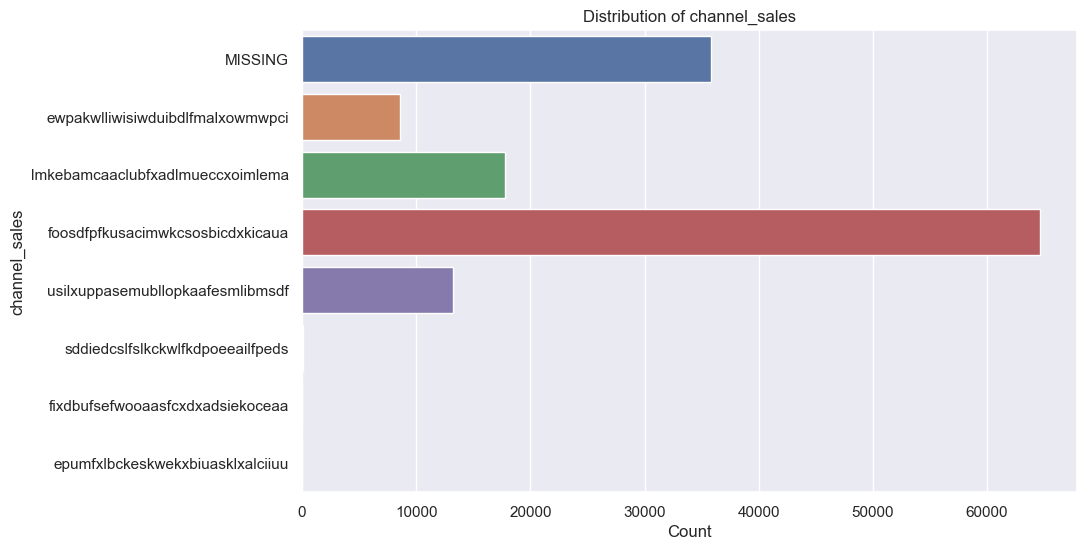

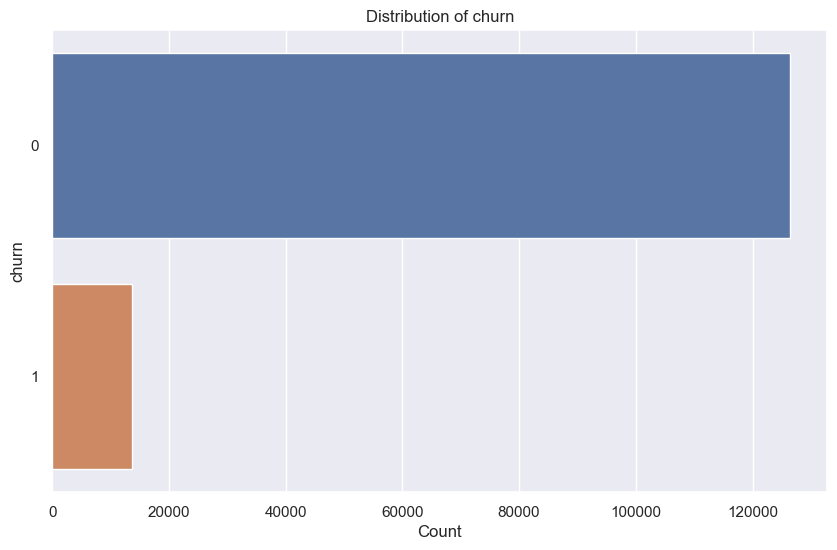

In [31]:
plot_categorical_distributions(df_train_full, categorical)

In [32]:
def compute_and_display_churn_rates(df, categorical_columns, global_mean):
    """
    Correctly computes and displays churn rates, ensuring accurate interpretation of 0 and 1.
    """
    
    for col in categorical_columns:
        # Aggregate churn data by category
        df_group = df.groupby(by=col).churn.agg(['mean'])
        
        # Correctly interpret churn rates
        df_group['diff'] = df_group['mean'] - global_mean
        df_group['rate'] = df_group['mean'] / global_mean
        
        # Display the corrected churn rates with accurate labels
        display(df_group)

In [33]:
compute_and_display_churn_rates(df_train_full, categorical, global_mean)

,mean,diff,rate
channel_sales,,,
MISSING,0.075378,-0.021967,0.774337
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,-0.097346,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,0.084787,-0.012558,0.870992
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,-0.097346,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,0.121924,0.024578,1.252480
lmkebamcaaclubfxadlmueccxoimlema,0.056155,-0.041191,0.576862
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,-0.097346,0.000000
usilxuppasemubllopkaafesmlibmsdf,0.101327,0.003981,1.040900


,mean,diff,rate
churn,,,
0,0.0,-0.097346,0.000000
1,1.0,0.902654,10.272654


### Findings up to now

The analysis highlights the importance of channel-specific strategies for customer retention. Channels with no churn represent best practices in customer engagement and satisfaction, while those with higher churn rates offer opportunities for targeted improvements to reduce churn and enhance customer loyalty.

* The analysis of churn rates across different channel_sales categories, with a global churn rate of 9.7%, reveals significant variations in customer retention and churn across channels:

1. Exceptional Retention Channels: The categories epumfxlbckeskwekxbiuasklxalciiuu, fixdbufsefwooaasfcxdxadsiekoceaa, and sddiedcslfslkckwlfkdpoeeailfpeds demonstrated exceptional customer retention, with no observed churn. These channels are highly effective in maintaining customer loyalty.

2. Better-than-Average Retention Channels: The MISSING, ewpakwlliwisiwduibdlfmalxowmwpci, and lmkebamcaaclubfxadlmueccxoimlema categories showed churn rates below the global average, indicating better retention strategies or higher customer satisfaction in these channels.

3. Channels with Room for Improvement: The foosdfpfkusacimwkcsosbicdxkicaua and usilxuppasemubllopkaafesmlibmsdf categories had churn rates above the global average. These channels may need to investigate the reasons behind the higher churn rates and develop targeted strategies to improve customer retention.

In [ ]:
# # Numerical columns distribution
# for column in df_train_full.select_dtypes(include=['float64', 'int64']).columns:
#     plt.figure(figsize=(10, 6))
#     sns.histplot(df_train_full[column], kde=True, bins=30)
#     plt.title(f'Distribution of {column}')
#     plt.show()

# # Categorical columns distribution
# for column in df_train_full.select_dtypes(include=['object']).columns:
#     plt.figure(figsize=(10, 6))
#     sns.countplot(y=df_train_full[column])
#     plt.title(f'Distribution of {column}')
#     plt.show()